# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv("./subset_rio.csv")

In [3]:
df['City'].unique()

array(['Angra dos Reis', 'Araruama', 'Barra do Piraí', 'Barra Mansa',
       'Cabo Frio', 'Cachoeiras de Macacu', 'Campos dos Goytacazes',
       'Cantagalo', 'Carmo', 'Casimiro de Abreu', 'Conceição de Macabu',
       'Duque de Caxias', 'Guapimirim', 'Itaboraí', 'Itaguaí', 'Japeri',
       'Macaé', 'Magé', 'Maricá', 'Mesquita', 'Nilópolis', 'Niterói',
       'Nova Friburgo', 'Nova Iguaçu', 'Paraíba do Sul', 'Petrópolis',
       'Pinheiral', 'Piraí', 'Queimados', 'Resende', 'Rio Bonito',
       'Rio das Ostras', 'Rio de Janeiro', 'São Francisco de Itabapoana',
       'São Gonçalo', 'São João da Barra', 'São João de Meriti',
       'São Pedro da Aldeia', 'Saquarema', 'Teresópolis', 'Três Rios',
       'Vassouras', 'Volta Redonda'], dtype=object)

In [4]:
rio_city_df = df[df.City == 'Rio de Janeiro'].copy()

In [5]:
def fill_holes(missing_records_df):
    # uses first record as the value in initial missing records
    first_idx = missing_records_df.index[0]
    first_recorded_idx = missing_records_df['Ct_Value'].first_valid_index()
    first_idx ,first_recorded_idx
    initial_unrecorded_idxs = list(range(first_idx,first_recorded_idx))
    missing_records_df.loc[initial_unrecorded_idxs, 'Ct_Value'] = missing_records_df.loc[first_recorded_idx].Ct_Value

    # linear interpolation in missing records
    missing_records_df['Ct_Value'] = missing_records_df['Ct_Value'].interpolate(method='linear')
    return missing_records_df

In [6]:
rio_city_df = fill_holes(rio_city_df)

In [7]:
rio_city_df[rio_city_df.Ct_Value.isna()]

,City,State,Date,Ct_Value,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalCases_100k_inhab,TotalDeaths_100k_inhab,...,Proportion_Rural_Pop,Municipal_HDI_Overall,Municipal_HDI_Longevity_Dimension,Municipal_HDI_Educational_Dimension,Municipal_HDI_Income_Dimension,Proportion_Poor,Gini_Coefficient,Theil_Index,Latitude,Longitude


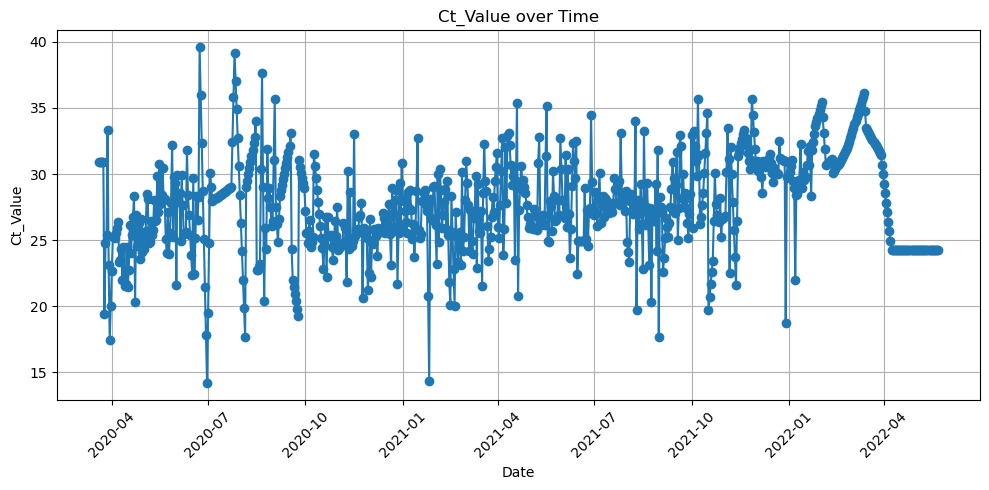

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(rio_city_df['Date']), rio_city_df['Ct_Value'], marker='o')
plt.xlabel('Date')
plt.ylabel('Ct_Value')
plt.title('Ct_Value over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
np.save("X_COVID.npy", ct_value_array)

In [24]:
ct_value_array.shape

(794,)